In [45]:
import sys
sys.path.append("..")
import mesinesp2.data
import mesinesp2.tokenizer
import collections
import matplotlib.pyplot as plt
import sklearn.feature_extraction
import sklearn.preprocessing
import sklearn.neural_network

In [9]:
train, dev, test = mesinesp2.data.load_dataset('../data/raw', 1)

In [10]:
descriptions = mesinesp2.tokenizer.get_descriptions("../data/raw/DeCS2020.obo", tokenize_definition = False, tokenize_name = False)

In [11]:
len(descriptions)

34067

In [55]:
decs_codes_train = []
decs_codes_codes_train = []
for codes in train.decsCodes.tolist():
    decs_codes_codes_train.extend(codes)
    codes = [descriptions[code]["name"] for code in codes]
    decs_codes_train.extend(codes)
decs_codes_train_counts = dict(collections.Counter(decs_codes_train).most_common())
decs_codes_codes_train_counts = dict(collections.Counter(decs_codes_codes_train).most_common())

In [13]:
len(decs_codes_train_counts)

22581

In [49]:
len(decs_codes_train)

2075360

In [56]:
sum(list(decs_codes_codes_train_counts.values())[:100])

970996

In [57]:
decs_codes_to_use = list(decs_codes_codes_train_counts.keys())[:100]

In [14]:
decs_codes_dev = []
for codes in dev.decsCodes.tolist():
    codes = [descriptions[code]["name"] for code in codes]
    decs_codes_dev.extend(codes)
decs_codes_dev_counts = dict(collections.Counter(decs_codes_dev).most_common())

In [15]:
len(decs_codes_dev_counts)

3750

In [24]:
set(decs_codes_dev_counts.keys()) - set(decs_codes_train_counts.keys())

{'Acaridae',
 'Antígeno CD47',
 'Análisis de Impacto Presupuestario',
 'Apartheid',
 'Araceae',
 'Artesunato',
 'Asesoramiento de Urgencias Médicas',
 'Capital Social de Redes',
 'Clima Ecuatorial',
 'Cloro Residual',
 'Color del Agua',
 'Consorcio Público',
 'Copolímero de Ácido Poliláctico-Ácido Poliglicólico',
 'Delegación Profesional',
 'Dieta Rica en Proteínas y Pobre en Hidratos de Carbono',
 'Digestores',
 'Dominios Proteicos',
 'Efectos Colectivos de las Desigualdades en Salud',
 'Efluentes Industriales',
 'Emisión Radiactiva',
 'Ertapenem',
 'Espectroscopía de Resonancia Magnética con Carbono-13',
 'Extremófilos',
 'Familia Militar',
 'Fatiga de Alerta del Personal de Salud',
 'Fibra de Algodón',
 'Financiación de los Sistemas de Salud',
 'Fotosíntesis',
 'Física Nuclear',
 'Gasto Catastrófico',
 'Iterbio',
 'Marsileaceae',
 'Metarhizium',
 'Microscopía de Fluorescencia por Excitación Multifotónica',
 'Nematocera',
 'Nostoc',
 'Paracoccus',
 'Personalidad Tipo D',
 'Pluviometr

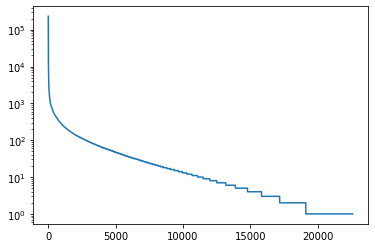

In [28]:
plt.plot(list(decs_codes_train_counts.values()))
plt.yscale('log')
plt.show()

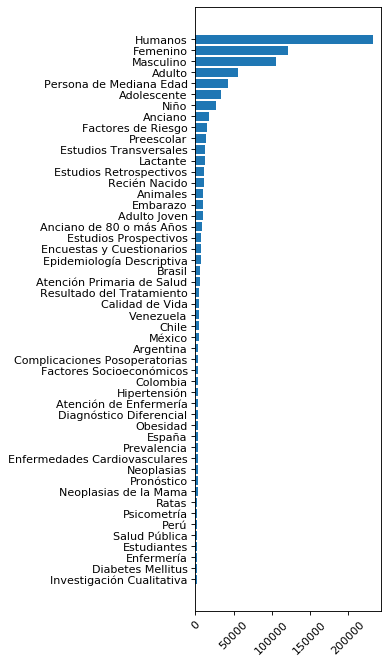

In [29]:
plt.figure(figsize=(3, 10), dpi=80)
plt.barh(
    list(decs_codes_train_counts.keys())[:50],
    list(decs_codes_train_counts.values())[:50],
)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.show()

In [30]:
x_train, y_train = mesinesp2.tokenizer.transform(train, descriptions, split_sentences = False, transform_labels = False)
x_dev, y_dev = mesinesp2.tokenizer.transform(dev, descriptions, split_sentences = False, transform_labels = False)

Transforming 249474 articles..
249474 articles transformed in 0.913917609055837 minutes.
Transforming 1065 articles..
1065 articles transformed in 0.004072010517120361 minutes.


In [14]:
x_train

0         [La, resiliencia, importa, :, explicación, de,...
1         [La, Quercetina, como, un, potencial, nutracéu...
2         [Explorando, la, perspectiva, de, los, residen...
3         [Respuesta, de, un, centro, de, salud, ante, l...
4         [Consecuencias, sociolaborales, del, confinami...
                                ...                        
249469    [Operaciones, discursivas, y, contextos, argum...
249470    [Relaciones, entre, recursos, humanos, y, cult...
249471    [Contraste, conductual, en, operantes, relacio...
249472    [Historia, de, maltrato, físico, en, la, infan...
249473    [Más, allá, de, la, relación, terapéutica, :, ...
Length: 249474, dtype: object

In [16]:
y_train

0         [D058873, D006801, D008875, D010555, D000369, ...
1         [D006801, D018352, D015203, D019587, D065129, ...
2         [D058873, D006801, D020375, D018352, D017216, ...
3         [D006801, D045169, D006275, D003661, D010043, ...
4         [D008297, D058873, D009103, D055815, D013030, ...
                                ...                        
249469    [D019484, D006801, D035761, D002648, D008297, ...
249470    [D006801, D015279, D008297, D005260, D00007832...
249471    [D006801, D003216, D008297, D004191, D005260, ...
249472    [D006801, D003071, D002649, D008297, D055815, ...
249473    [D006801, D026441, D008297, D005260, D005196, ...
Name: decsCodes, Length: 249474, dtype: object

In [59]:
def filter_decs(l):
    return [e for e in l if e in decs_codes_to_use]

In [60]:
y_train_filtered = [filter_decs(l) for l in y_train]

In [39]:
identity_tokenizer = lambda x: x
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer = identity_tokenizer, lowercase=False)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_dev_vectorized = vectorizer.transform(x_dev)

In [62]:
binarizer = sklearn.preprocessing.MultiLabelBinarizer()
y_train_binarized = binarizer.fit_transform(y_train_filtered)
y_dev_binarized = binarizer.transform(y_dev)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['D000003', 'D000006', 'D000007', 'D000009', 'D000013', 'D000015', 'D000020', 'D000026', 'D000038', 'D000041', 'D000051', 'D000056', 'D000058', 'D000061', 'D000062', 'D000063', 'D000066448', 'D000066477', 'D000066491', 'D000066492', 'D000066494', 'D000066498', 'D000066499', 'D000066511', 'D000066530', 'D000066550', 'D000066553', 'D000066888', 'D000066908', 'D000066949', 'D000067010', 'D000067013', 'D000067073', 'D000067251', 'D000067290', 'D000067292', 'D000067450', 'D000067453', 'D000067489', 'D000067495', 'D000067548', 'D000067565', 'D000067576', 'D000067697', 'D000067716', 'D000067877', 'D000067896', 'D000067936', 'D000068', 'D000068079', 'D000068099', 'D000068101', 'D000068105', 'D000068116', 'D000068181', 'D000068336', 'D000068337', 'D000068356', 'D000068376', 'D000068616', 'D000068617', 'D000068679', 'D000068696', 'D000068698', 'D000068756', 'D000068857', 'D000068878', '

In [ ]:
classifier = sklearn.neural_network.MLPClassifier(verbose=True)
classifier.fit(
    x_train_vectorized,
    y_train_binarized
)

Iteration 1, loss = 12.02660915
Iteration 2, loss = 7.74276729
Iteration 3, loss = 6.30216373
Iteration 4, loss = 5.40962274
Iteration 5, loss = 4.70675100
Iteration 6, loss = 4.11168400
Iteration 7, loss = 3.59446212
Iteration 8, loss = 3.13942686
Iteration 9, loss = 2.74202013
Iteration 10, loss = 2.39390216
Iteration 11, loss = 2.09221094
Iteration 12, loss = 1.83160426
Iteration 13, loss = 1.60818382
Iteration 14, loss = 1.41552205
Iteration 15, loss = 1.25312155
Iteration 16, loss = 1.11219565
Iteration 17, loss = 0.99396348
Iteration 18, loss = 0.89375778
Iteration 19, loss = 0.80830684
Iteration 20, loss = 0.73624516
Iteration 21, loss = 0.67530452
Iteration 22, loss = 0.62464443
Iteration 23, loss = 0.58032643
Iteration 24, loss = 0.54344871
Iteration 25, loss = 0.51280534
Iteration 26, loss = 0.48609271
Iteration 27, loss = 0.46296381
Iteration 28, loss = 0.44383149
Iteration 29, loss = 0.42690838
Iteration 30, loss = 0.41279530
Iteration 31, loss = 0.39837601
Iteration 32, lo